# Analisi con la DMA


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# \dma\CFRP_0.5N encoding = 'cp1252' engine='python' skipfooter =1 decimal= ","

def estrai(path_base,N,name = None):
    if name == None:
        name = np.arange(1,N+1)
    else:
        N = len(name)
    data = pd.DataFrame(columns = ['test','f','M*','tan_delta'])
    names = ['Index','Ts','t','f','F','x','Phase','F0','x0','Tr','M','M\'','M*','tan_delta','C','C\'','C*']
    for i in range(N):
        df = pd.read_csv(path_base+f'_{name[i]}.txt',delimiter='  ',names = names,skiprows=2,encoding = 'cp1252',engine='python',skipfooter =1)
        df['test'] = f'test_{name[i]}'
        df['f'] = df['f'].str.replace(',','.')
        df['f'] = pd.to_numeric(df['f'])
        df['M*'] = df['M*'].str.replace(',','.')
        df['M*'] = pd.to_numeric(df['M*'])
        df['tan_delta'] = df['tan_delta'].str.replace(',','.')
        df['tan_delta'] = pd.to_numeric(df['tan_delta'])
        data = pd.merge(data,df[['test','f','M*','tan_delta']],how='outer')
    data = data.set_index(['test'])
    return data
    #print(data.loc['test_1N_1']['tan_delta'])

path_base = r'dma/CFRP_1N/CFRP_1N'
data_1N = estrai(path_base,5)
print(data_1N)


             f       M*  tan_delta
test                              
test_1    0.01  22916.3   0.074235
test_1    5.01  22425.5   0.148819
test_1   10.01  22115.6   0.147692
test_1   15.01  21805.9   0.105217
test_1   20.01  21545.4   0.054737
...        ...      ...        ...
test_5   80.01  19742.0   0.063255
test_5   85.01  19533.1   0.065409
test_5   90.01  19332.1   0.070395
test_5   95.01  19125.8   0.075481
test_5  100.01  18930.0   0.077437

[105 rows x 3 columns]


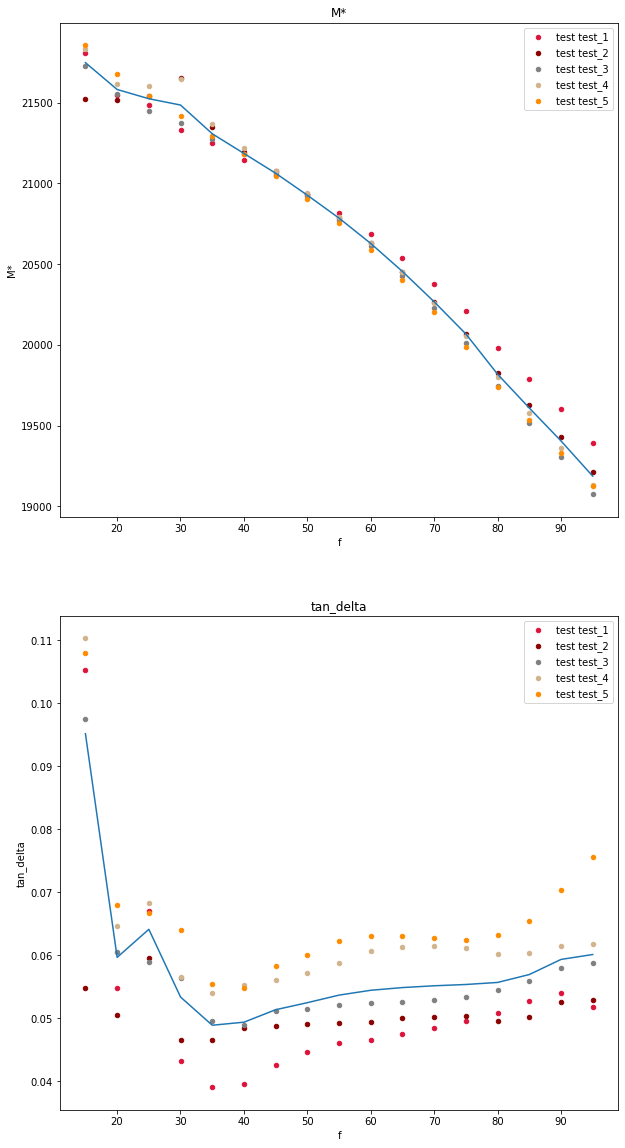

In [5]:
def plottaggio(data,N,ax1,ax2,label='',f_min=0,f_max=None):
    name = pd.Series(data.index.values).unique() # da rivedere
    if f_max == None:
        f_max = data.loc[name[0]]['f'][-1]
    data = data[(data['f'] >= f_min) & (data['f'] <= f_max)]
    N = len(name)
    colori = ['darkred','grey','tan','darkorange','darkviolet','crimson']
    M_media = np.zeros(data.loc[name[0]]['M*'].size)
    tan_media = np.zeros(data.loc[name[0]]['M*'].size)
    f = data.loc[name[0]]['f'].to_numpy()

    for i in range(N):
        data.loc[name[i]].plot.scatter(x='f',y='M*',ax = ax1,label=f'test {name[i]}{label}',color=colori[i-1])
        data.loc[name[i]].plot.scatter(x='f',y='tan_delta',ax = ax2,label=f'test {name[i]}{label}',color=colori[i-1])
        M_media += data.loc[name[i]]['M*'].to_numpy()/(N)
        tan_media += data.loc[name[i]]['tan_delta'].to_numpy()/(N)

    ax1.plot(f,M_media,label='media')
    #coef = np.polyfit(f,M_media,30)
    #f_fittato = np.arange(f[0],f[-1],0.5) 
    #M_media_fittato = np.zeros(f_fittato.shape)
    #for i in range(len(coef)):
    #    M_media_fittato += coef[i]*f_fittato**i
    #ax1.plot(f_fittato,M_media_fittato,label='media')    
    ax2.plot(f,tan_media,label='media')
    ax1.set(title='M*')
    ax2.set(title='tan_delta')
    return (ax1,ax2)

f_min = 15
f_max = 100
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_1N,5,ax1,ax2,f_min = f_min,f_max = f_max)
plt.show()


## dati con 0.5N di forza

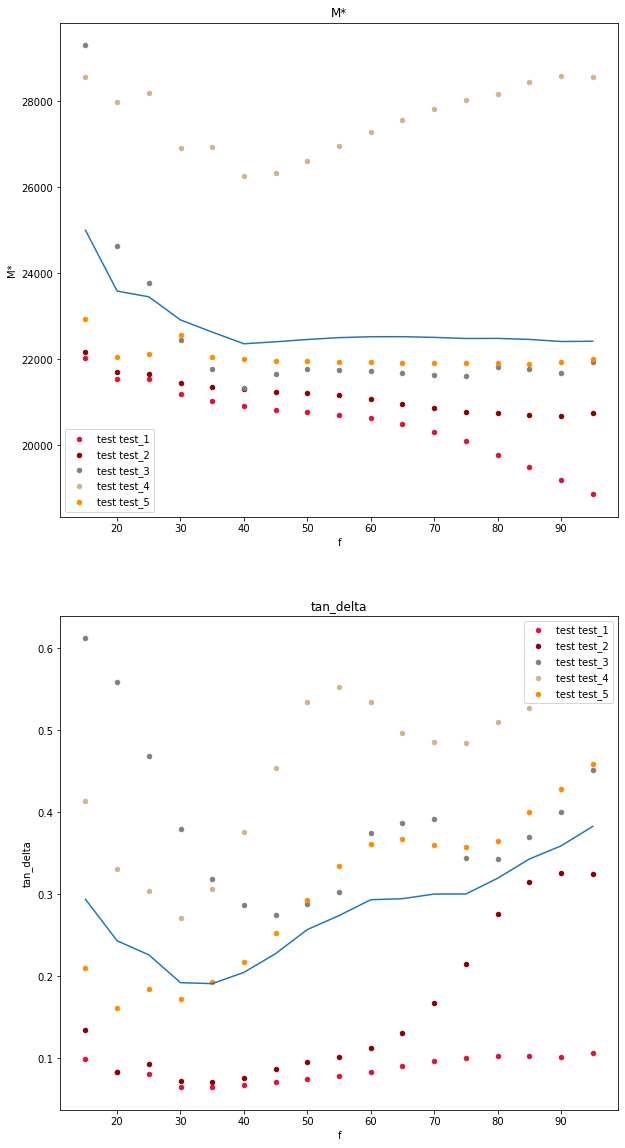

In [6]:
# set a 0.5N
path_base = r'dma/CFRP_05N/CFRP_0.5N'
data_5N = estrai(path_base,5)
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_5N,5,ax1,ax2,f_min = f_min,f_max = f_max)
plt.show()

## 1N fitto fino ai 50Hz

<function matplotlib.pyplot.show(*args, **kw)>

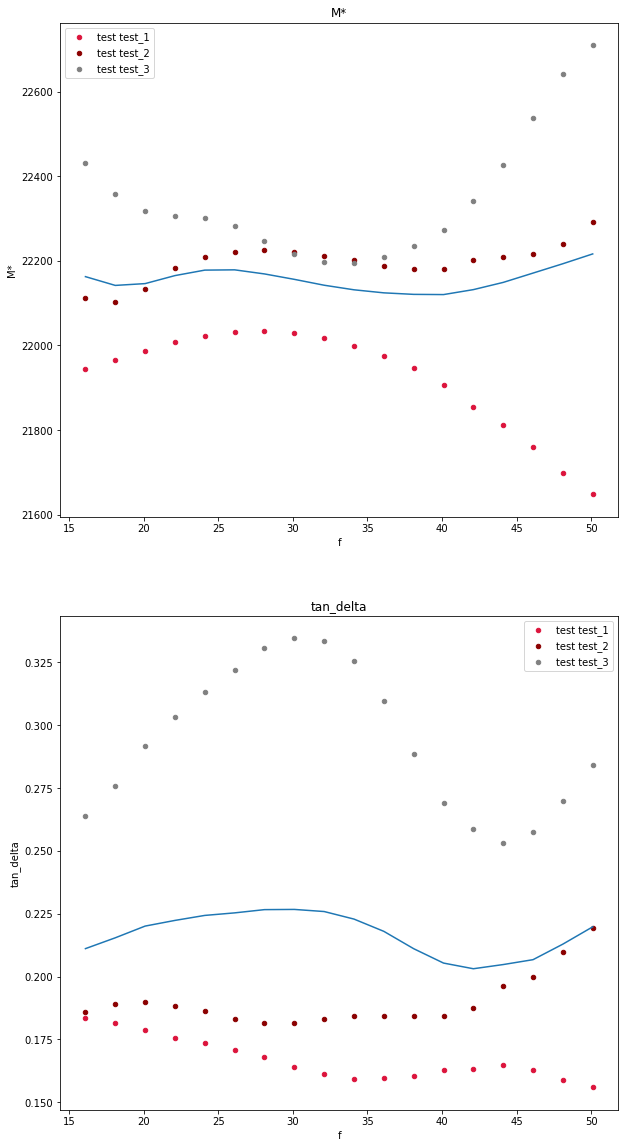

In [7]:
# set a 1N fitto (fmax 50Hz)
path_base = r'dma/CFRP_1N _50HZ/CFRP_1N'
data_1N_50 = estrai(path_base,3)
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_1N_50,3,ax1,ax2,f_min = f_min,f_max = f_max)
plt.show

                        f       M*  tan_delta
test                                         
test_1           0.999999  16433.6   0.023084
test_1          11.000000  16515.2   0.018853
test_1          21.000000  16529.2   0.017621
test_1          31.000000  16500.2   0.017096
test_1          41.000000  16469.0   0.017500
test_1          51.000000  16465.5   0.016115
test_1          61.000000  16426.8   0.018615
test_1          71.000000  16396.1   0.018990
test_1          81.000000  16362.9   0.019856
test_1          91.000000  16332.7   0.020493
test_1         101.000000  16307.5   0.020183
test_1_dietro    0.999999  17727.1   0.022612
test_1_dietro   11.000000  17731.9   0.019052
test_1_dietro   21.000000  17770.9   0.017891
test_1_dietro   31.000000  17811.5   0.017802
test_1_dietro   41.000000  17842.2   0.017812
test_1_dietro   51.000000  17844.1   0.016498
test_1_dietro   61.000000  17878.4   0.018709
test_1_dietro   71.000000  17895.3   0.019732
test_1_dietro   81.000000  17908.9

<function matplotlib.pyplot.show(*args, **kw)>

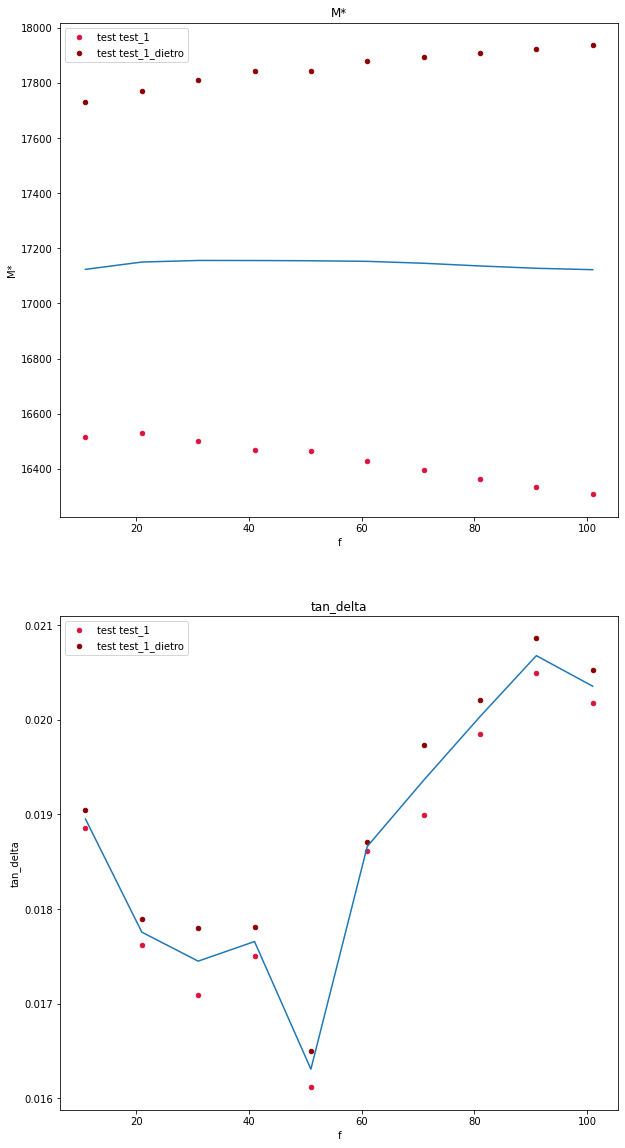

In [8]:
path_base = r'dma/Marzo 17/strato 1/cfrp_f1_100'

data_strato_1 = estrai(path_base,2,name = ['1','1_dietro'])
print(data_strato_1)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_strato_1,2,ax1,ax2,f_min = 10)
plt.show


                        f       M*  tan_delta
test                                         
test_1           0.999999  16433.6   0.023084
test_1          11.000000  16515.2   0.018853
test_1          21.000000  16529.2   0.017621
test_1          31.000000  16500.2   0.017096
test_1          41.000000  16469.0   0.017500
test_1          51.000000  16465.5   0.016115
test_1          61.000000  16426.8   0.018615
test_1          71.000000  16396.1   0.018990
test_1          81.000000  16362.9   0.019856
test_1          91.000000  16332.7   0.020493
test_1         101.000000  16307.5   0.020183
test_1_dietro    0.999999  17727.1   0.022612
test_1_dietro   11.000000  17731.9   0.019052
test_1_dietro   21.000000  17770.9   0.017891
test_1_dietro   31.000000  17811.5   0.017802
test_1_dietro   41.000000  17842.2   0.017812
test_1_dietro   51.000000  17844.1   0.016498
test_1_dietro   61.000000  17878.4   0.018709
test_1_dietro   71.000000  17895.3   0.019732
test_1_dietro   81.000000  17908.9

<function matplotlib.pyplot.show(*args, **kw)>

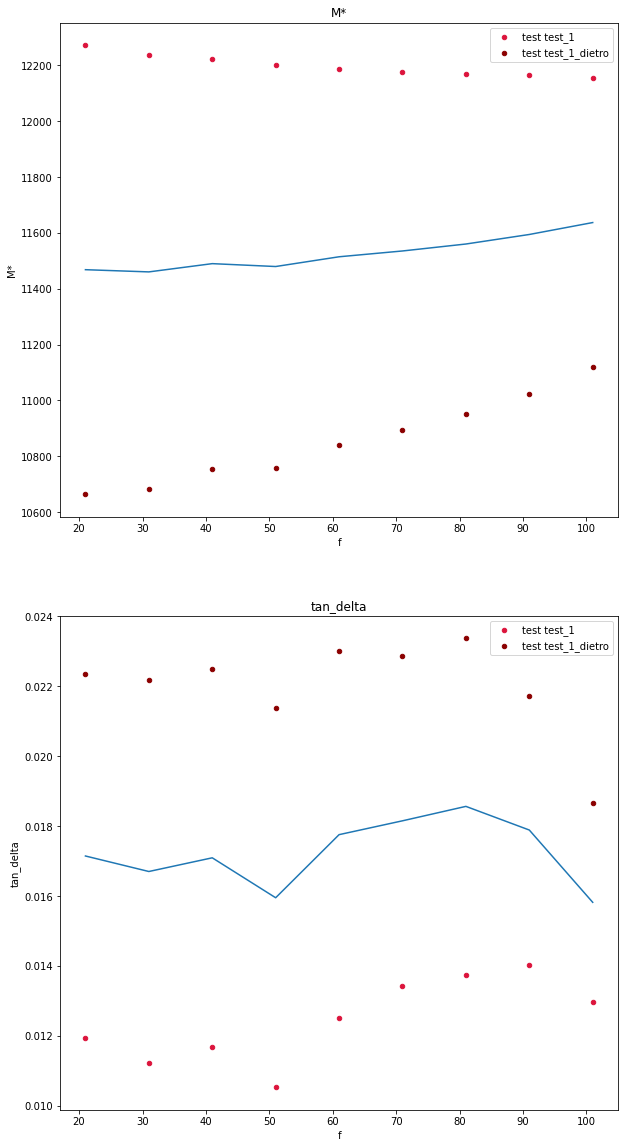

In [9]:
path_base = r'dma/Marzo 17/strato 4/cfrp_f1_100'

data_strato_4 = estrai(path_base,2,name = ['1','1_dietro'])
print(data_strato_1)

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))
plottaggio(data_strato_4,2,ax1,ax2,f_min = f_min)
plt.show

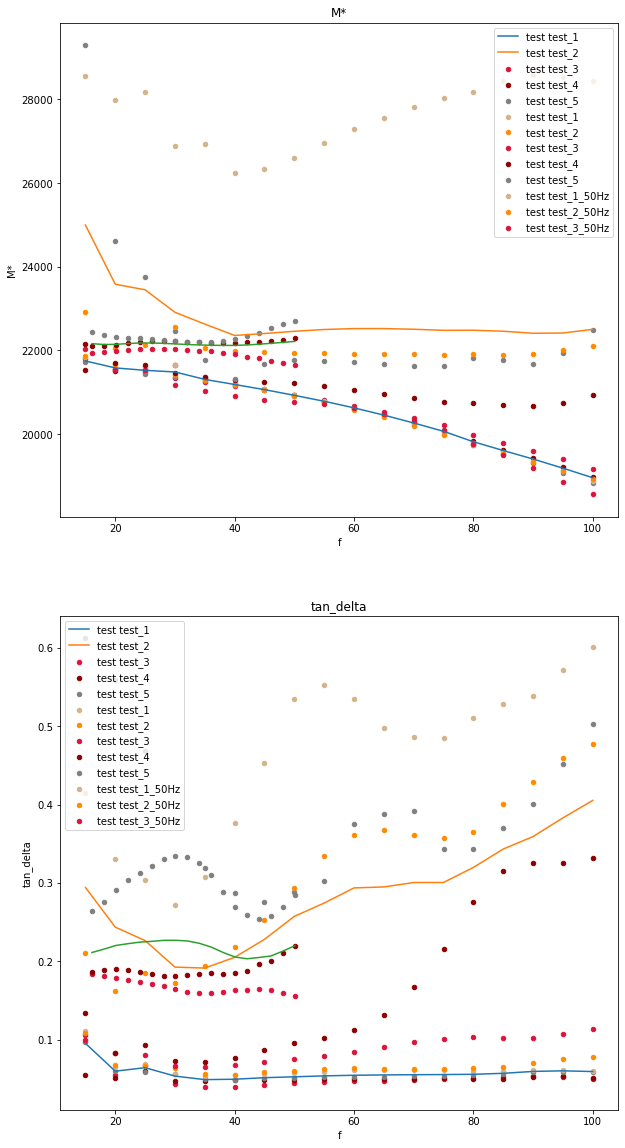

In [10]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))

plottaggio(data_1N,5,ax1,ax2,f_min = f_min)
plottaggio(data_5N,5,ax1,ax2,f_min = f_min)
plottaggio(data_1N_50,3,ax1,ax2,label='_50Hz',f_min = f_min)

plt.show()


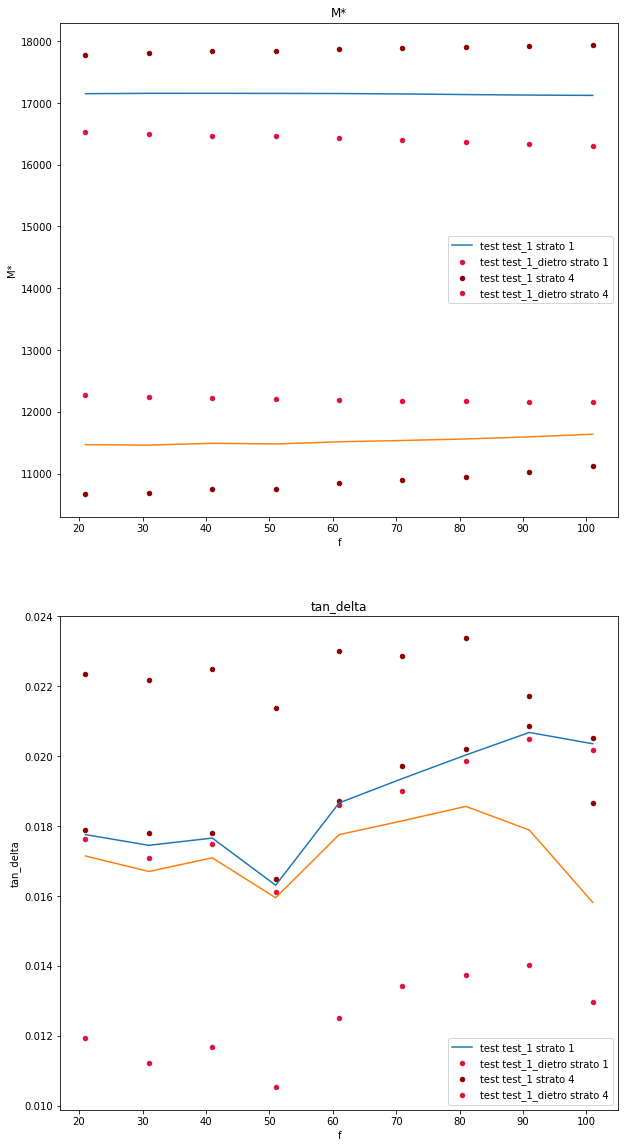

In [13]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(10,20))

plottaggio(data_strato_1,2,ax1,ax2,f_min = f_min,label = ' strato 1')
plottaggio(data_strato_4,2,ax1,ax2,f_min = f_min,label = ' strato 4')
plt.show()